# **Laboratorio 3: Librer√≠as num√©ricas y de gr√°ficos, arreglos y matrices y formas cuadr√°ticas**
**Facultad de ingenier√≠a, departamento de Ingenier√≠a Biom√©dica, Universidad de los Andes**\
**IBIO-2440 Programaci√≥n cient√≠fica**

**Nombres de los integrantes**


1.   David Tob√≥n Molina
2.   David Santiago Rodr√≠guez Quiroga

**N√∫mero del grupo**

Grupo 2

Este laboratorio consta de dos partes, la primera asociada al uso de las librerias num√©ricas y de gr√°ficos (Numpy y Matplotlib), con aplicaciones como las opreaciones con arreglos y matrices y el c√°lculo de normas de un vector. Luego, est√° la parte sobre formas cuadr√°ticas, donde se incluyen ahora gr√°ficos tridimensionales, c√°lculo de valores y vectores propios einterpretaciones geom√©tricas. Se recomienda leer la siguiente informaci√≥n:

https://numpy.org/doc/stable/user/basics.html

https://matplotlib.org/stable/plot_types/index.html

# **M√≥dulos y librer√≠as**

En el siguiente laboratorio se busca recordar algunas funciones de *Numpy* para realizar diferentes operaciones matem√°ticas con arreglos, tambi√©n se busca implementar diferentes tipos de gr√°ficas usando la librer√≠a *Matplotlib*. Se explica c√≥mo hacer un plot b√°sico, subplots, barras e histogramas.

Importe las librer√≠as Numpy y Matplotlib

In [54]:
import matplotlib.pyplot as plt
import numpy as np

1.	Escriba una funci√≥n que multiplique todos los n√∫meros de un arreglo. Luego pruebela con ejemplo.

In [55]:
def multiply_array(numero:list)->float:
    m = 1
    for n in numero:
        m = m*n
    return m 

x = [1,2,3,4,5]
print(multiply_array(x))

120


2. Escriba una funci√≥n que calcule el factorial de un n√∫mero entero positivo. Luego pruebela con ejemplo.


In [56]:
def factorial_v1(n: int):
    if n > 0 and isinstance(n, int):
        f = 1
        while n > 0:
            f *= n
            n -= 1
        return f
    else:
        return f"{n} no es un entero positivo"
 
   
def factorial_v2(n: int, fact=1):
    if n > 0:
        return factorial_v2(n-1, fact*n)
    elif n < 0:
        return f"{n} no es un entero positivo"
    else:
        return fact


print(factorial_v1(12))
print(factorial_v2(12))

479001600
479001600


3. Escriba una funci√≥n que indique si un n√∫mero entero positivo pertenece a la serie de Fibonacci. Luego pruebela con ejemplo.

In [57]:
def is_fibonacci(n, n0=0, n1=1):
    if n == n0:
        return True
    elif n < n0:
        return False
    else:
        return is_fibonacci(n,  n1, n1 + n0 )
    
print(is_fibonacci(33))
print(is_fibonacci(34))

False
True


4. Usando las funciones de las librer√≠as numpy y matplotlib para Python obtenga 1000 valores aleatorios con distribuci√≥n uniforme y 1000 valores con una distribuci√≥n normal. S√∫melos y grafique el correspondiente histograma para 10, 20, 30 y 50 particiones (bins). (Utilice subplots). *Pista: Para generar los valores use el m√≥dulo random de la librer√≠a numpy.*

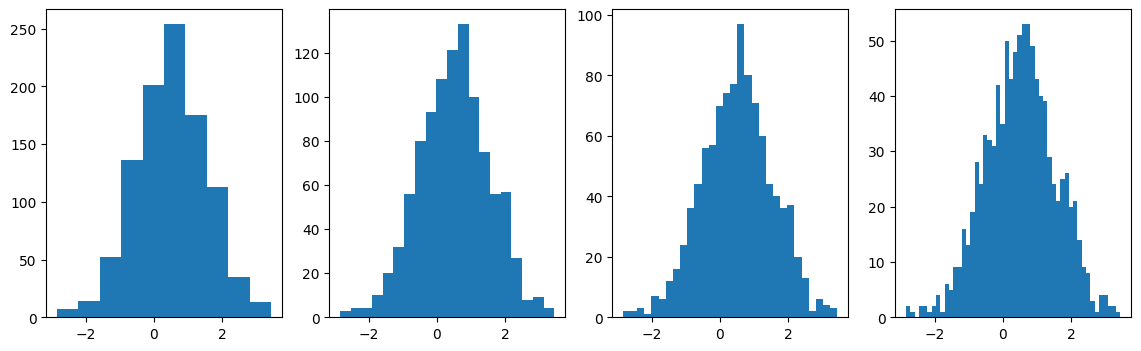

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def hist_random_ints():
    bins = [10, 20, 30, 50]
    rand_uniform = np.random.uniform(size=1000)
    rand_normal = np.random.normal(size=1000)
    values = np.add(rand_uniform, rand_normal)

    plt.figure(figsize=(14, 4))
    for i in range(len(bins)):
        plt.subplot(1, 4, i+1)
        plt.hist(values, bins[i])
    plt.plot()
    
hist_random_ints()

5. Para un sistema masa-resorte que describe un Movimiento Arm√≥nico Simple (m.a.s) como el de la siguiente figura:

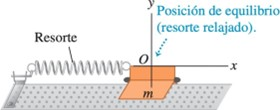


Zemansky, S. (2013). Movimiento Peri√≥dico. In Pearson (Ed.), F√≠sica Universitaria (12th 
ed., pp. 65‚Äì71). Pearson. https://doi.org/10.1057/9781137311955_5

Grafique el desplazamiento, velocidad y aceleraci√≥n bajo los par√°metros: 

T = 4s (periodo) 
t = 8s (duraci√≥n) 
A = 5m (amplitud) 

Recuerde que el desplazamiento est√° dado por la ecuaci√≥n:

ùë• = ùê¥  ùëêùëúùë†(œâùë° + œï)

Donde x es el desplazamiento en una dimensi√≥n, œâ es la velocidad angular (rad/seg) y œï es la fase inicial. 

*Pista: Cree un vector de tiempo que vaya desde 0 hasta el tiempo final(t).*

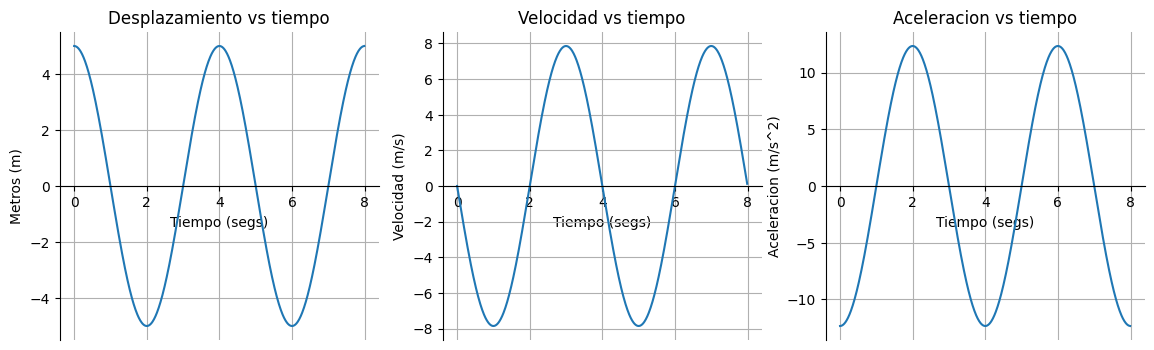

In [59]:
def graph_MAS(periodo, duracion, amplitud):
    
    # DESPLAZAMIENTO
    w = ((2*np.pi)/periodo)
    x = np.arange(0, duracion, 0.01)
    #Desplazamiento
    y = amplitud*np.cos(w*x)
    #Velocidad
    v = -amplitud*w*np.sin(w*x)
    #Aceleraci√≥n
    a = -amplitud*(w**2)*np.cos(w*x)
    
    graficas = [[y, "Desplazamiento vs tiempo", "Metros (m)"], [v, "Velocidad vs tiempo", "Velocidad (m/s)"], [a, "Aceleracion vs tiempo", "Aceleracion (m/s^2)"]]    
    plt.figure(figsize=(14, 4))
    
    for i in range(len(graficas)):
        ax = plt.subplot(1, 3, i+1)
        plt.title(graficas[i][1])
        plt.xlabel("Tiempo (segs)")
        plt.ylabel(graficas[i][2])
        plt.grid()
        
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        plt.plot(x, graficas[i][0])
    
graph_MAS(4, 8, 5)
    

6. Sean A, B y C las siguientes matrices:



\begin{align}
A = \begin{pmatrix}
0.1 & 2 \\
2 & 0.1
\end{pmatrix}
\\
B = \begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 4
\end{pmatrix}
\\
C = \begin{pmatrix}
5/3 & 2/3 \\
2/3 & 5/3
\end{pmatrix}
\end{align} 
>Realice las siguientes operaciones matriciales, donde $‚àó$ es el producto punto entre dos matrices.


\begin{align}
1. \ A * B\\
2. \ A^2 ‚àó B\\
3. \ C^3 * B\\
\end{align} 





In [60]:
a =[[0.1, 2],[2,0.1]]
b = [[1,2,3],[4,5,4]]
c = [[5/3,2/3],[2/3,5/3]]

A = np.array(a)
B = np.array(b)
C = np.array(c)

x1 = A.dot(B)
x2 = (np.linalg.matrix_power(A, 2)).dot(B)
x3 = (np.linalg.matrix_power(C, 3)).dot(B)

print(x1)
print(x2)
print(x3)

[[ 8.1 10.2  8.3]
 [ 2.4  4.5  6.4]]
[[ 5.61 10.02 13.63]
 [16.44 20.85 17.24]]
[[30.25925926 42.96296296 43.96296296]
 [33.25925926 45.96296296 44.96296296]]



7. a. Cree una funci√≥n que tenga como entrada un vector real cualquiera 2x1 y el par√°metro $L$. La funci√≥n debe debe asignar las entradas del vector como coeficientes de las variables $x_1$ y $x_2$ de la siguiente forma:\\

Sea el vector $V = [a,b]^T$, luego, se debe crear el vector $X = [ax_1, bx_2]^T$

Luego, calcular la norma $L$ del vector, es decir, si $L=1$, calcula la norma $L1$, mientras que si $L=2$, calcula la $L2$. Adem√°s, debe graficar la una curva de nivel con valor arbitrario $c$ de la funci√≥n que se genera con la norma.

In [61]:

def graph_norma(vector, norma, L):
    
    A = np.matrix(vector).getT()
    x1, x2 = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    if L == 1:
        Z = abs(X1*A[0, 0]) + abs(X2*A[1, 0])
    else:
        Z = ((X1 * A[0, 0])**2 +  (X2 * A[1, 0])**2)**(1/2)
    
    
    plt.figure()
    plt.contour(X1, X2, Z, levels=[norma], colors='red')
    ax = plt.subplot()
    ax.spines['bottom'].set_position('center')
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.title(f"Norma L{L}")
    plt.show()
    
    
def norma_vector(vector, L):
    
    norma = None
    
    if L == 1:
        norma = 0
        for i in vector:
            norma += abs(i)
        print(f"Norma L{L}: {norma}")
        graph_norma(vector, norma, L)
        
    elif L == 2:
        norma = 0
        for i in vector:
            norma += i**2
        norma = (norma)**(1/2)
        print(f"Norma L{L}: {norma}")
        graph_norma(vector, norma, L)

b. Use su funci√≥n anterior para calcular y graficar la norma tanto $L1$ como $L2$ del vector $[5,2]$.

Norma L1: 7


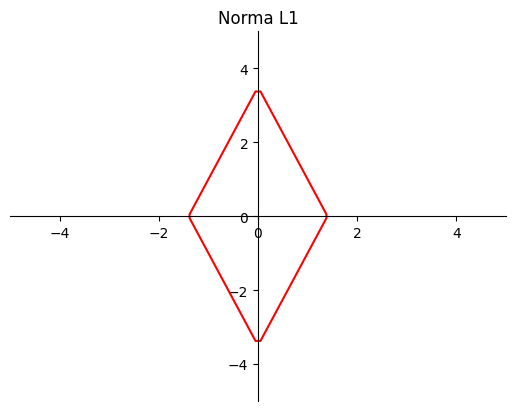

Norma L2: 5.385164807134504


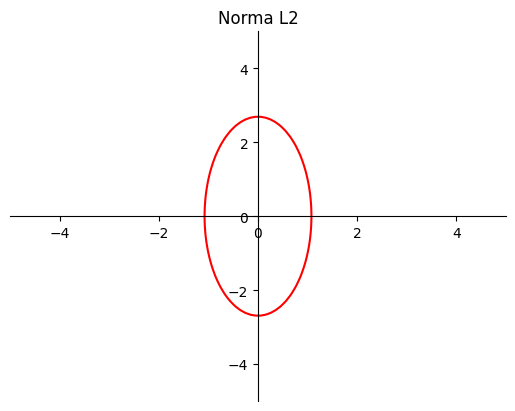

In [62]:
norma_vector([5,2], 1)
norma_vector([5,2], 2)

# **Curvas de nivel, superficies, valores y vectores propios en formas cuadr√°ticas**

La optimizaci√≥n es una rama de las matem√°ticas que busca determinar de forma tanto cuantitativa como cualitativa la mejor manera de solucionar un problema. Cuando se optimiza de forma cuantitativa, el deseo es determinar m√°ximos o m√≠nimos de una funci√≥n escalar de una o m√°s variables bajo ciertas restricciones. Dicha funci√≥n puede tomar cualquier forma siempre y cuando cumpla con algunas caracter√≠sticas como de diferenciaci√≥n, continuidad, entre otras, sin embargo, una de las formas m√°s trabajadas en el √°rea de la inteligencia artificial es la forma cuadr√°tica. Esta forma se plantea de la siguiente manera:

\begin{align*}
f(X)=\frac{1}{2}X^TQX + B^TX+C
\end{align*}

Donde $Q$ es una matriz constante, $B$ un vector constante y $C$ una constante y $X$ es el vector de las variables. Notar que la funci√≥n $f:\mathbb{R^n}\rightarrow\mathbb{R}$, sin embargo, para poder graficar, se va a trabajar solamente con $f:\mathbb{R^2}\rightarrow\mathbb{R}$. Los algoritmos de optimizaci√≥n tradicionales funcionan bien si la matriz $Q$ cumple ciertas restricciones, por lo que, primemero se trabajar√° con esta. La idea de esta parte es crear una funci√≥n que cumpla ciertas caracter√≠stas para al final aplicarla con algunos ejemplos..


1. Genere una funci√≥n que reciba como entrada una matriz cualquiera $Q$ e imprima un arreglo con los coeficientes de la siguiente forma cuadr√°tica:

\begin{align*}
  a_1x_1^2 + a_2x_2^2 + a_3x_1x_2 
\end{align*}

2. Agregue la funci√≥n que permita obtener la forma sim√©trica de la matriz $Q$, llamada $Q_s$ en caso de que no lo sea, si es sim√©trica, indicar que ya es sim√©trica.

3. Adicionar la funci√≥n que permita decir si la matriz $Q$ es positiva definida, negativa definida, positiva semidefinida, negativa semidefinida, o ninguna de las anteriores.

4. Ahora, el algoritmo debe encontrar la matriz $Œõ$, que es la matriz diagonal de valores propios, la matriz $V$ que es de los vectores propios normalizados asociados a $Q_s$

5. Recordando la teor√≠a de √°lgebra lineal se sabe que $Q_s=VŒõV^T$. Haga que el algoritmo reemplace esta expresi√≥n en la forma cuadr√°tica y haga el cambio de variable $V^TX = Y$, para definir la forma cuadr√°tica como $f(Y) = Y^TŒõY$.

6. El objetivo de lo anterior es darle una interpretaci√≥n gr√°fica a la forma cuadr√°tica. Para esto, el agoritmo debe graficar una curva de nivel con un valor cualquiera $c$ para la forma cuadr√°tica con variables $X$ $(f(X) = X^TQX)$ y con variables $Y$ $(f(Y) = Y^T\Lambda Y)$. Grafique tambi√©n los vectores propios y los v√©rtices y cov√©rtices de la elipse que se genera con rectas en ambas gr√°ficas **(excepto en el caso de que $Q$ sea indefinida o semidefinida)**. Tambi√©n el algoritmo debe indicar los valores num√©ricos de estos v√©rtices y cov√©rtices.

7. Adicionalmente, debe graficar una superficie para cada caso, es decir, tanto para $f(X)$ como para $f(Y)$, donde se resalten cinco curvas de nivel. Adem√°s, si la $f$ es convexa (Q positiva semidefinida o definida), grafique tambi√©n el punto m√≠nimo.

**Ayuda:** Notar que al hacer el cambio variable se llega a la siguiente forma cuadr√°tica:
\begin{align*}
f(Y) = Œª_1y_1^2 + Œª_2y_2^2
\end{align*}

Luego, si definen una curva de contorno con valor $c$, y hacer alguna de las dos variables cero, por ejemplo $y_2$, se obtiene:


  \begin{align*}
    c = Œª_1y_1^2 ‚Üí y_1^* = \sqrt\frac{c}{Œª_1}
  \end{align*}

  Ese ser√≠a uno de los v√©rtices de la elipse. Ahora, si desea encontrar los v√©rtices punto pero con variable $X$:

  \begin{align*}
    X^* = VY^*
  \end{align*}




In [63]:
#Punto 1
def coeficientes(q: np.array)->np.array:
    rta = np.empty((0,0), float)
    #Revisa si Q es cuadrada
    if len(q) != len(q[0]):
        return ('No es nxn, por lo que no es posible determinar los coeficientes de su forma cuadr√°tica')
    else:
        #Recorre las filas
        for i in range(len(q)):
            #Para las posiciones i,i se agregan los coeficientes al arreglo final
            rta = np.append(rta,q[i,i]) 
        for i in range(len(q)):
            #Recorre las columnas
            for j in range(len(q[0])):
                #Si la columna es mayor, se suman las dos posiciones (fila, columna + columna,fila) para encontrar el coeficiente
                if j>i:
                    rta = np.append(rta,(q[i,j]+q[j,i]))
    return rta

# Punto 2
# Revisar si la matriz es simetrica
def es_simetrica(q: np.array)->bool:
    a = np.transpose(q)
    if np.array_equal(a,q) == True:
        return True
    else:
        return False
    
#Encontrar la forma sim√©trica
def forma_simetrica(q:np.array)->np.array:
    rta = np.empty((0,0), float)
    if es_simetrica(q)==True:
        rta = q
    else:
        rta = 0.5*(q.dot(np.transpose(q)))
    return rta

# Calcular valores y vectores propios (normalizados)
def eigen(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    eigenvectors = np.transpose(eigenvectors)
    for i in range(len(eigenvectors)):
        eigenvectors[i] = eigenvectors[i]/np.linalg.norm(eigenvectors[i])
    return eigenvalues, eigenvectors

#Punto 3
# Revisar si la matriz es definida
def is_defined(matrix):
    
    m = np.array(matrix)
    Ms = (m+m.T)/2
    
    eigenvalues, eigenvectors = np.linalg.eig(Ms)
    eigenvalues_list = eigenvalues.tolist()
    
    def_pos = 0
    def_neg = 0
    semi_def_pos = 0
    semi_def_neg = 0
    for i in eigenvalues_list:
        if i > 0:
            def_pos += 1
            semi_def_pos += 1
        if i < 0:
            def_neg += 1
            semi_def_neg += 1
        elif i == 0:
            semi_def_pos += 1
            semi_def_neg += 1
            
    resp = 'indef'
    if def_pos == len(eigenvalues_list):
        resp ='def+'
    elif def_neg == len(eigenvalues_list):
        resp = 'def-'
    elif semi_def_pos == len(eigenvalues_list):
        resp =  'semidef+'
    elif semi_def_neg == len(eigenvalues_list):
        resp = 'semidef-'
    
    return resp

#Punto 4            
# Obtener matrcies de valores propios y vectores propios
def eigen_matrixes(q: list):
    
    M_eigenvalues = None
    M_eigenvectors = None
    
    Q = np.array(q)
    n, m = Q.shape
    
    if n == m:
        # Obtener Qs
        Qs = (Q+Q.T)/2
        eigenvalues, eigenvectors = eigen(Qs)
        # Armar matriz de valores propios
        M_eigenvalues = np.zeros((n,n))
        np.fill_diagonal(M_eigenvalues, eigenvalues)
        
        M_eigenvectors = eigenvectors.T
        
    return M_eigenvalues, M_eigenvectors

# punto 5, 6 y 7
def graph_forma_cuadratica(M, matriz_diag, eigenvectors):
    M = np.array(M)
    M = (M+M.T)/2
    x1, x2 = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
    X1, X2 = np.meshgrid(x1, x2)
    
    #Y = eigenvectors.T.dot(np.array([X1, X2]))
    
    Z1 = X1**2 * M[0, 0] + X2**2 * M[1, 1] + X1 * X2 * (M[0, 1]+M[1, 0])

    Z2 = X1**2 * matriz_diag[0, 0] + X2**2 * matriz_diag[1, 1] + X1 * X2 * (matriz_diag[0, 1]+matriz_diag[1, 0])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z1)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z2)
    plt.show()
    
    plt.contour(X1, X2, Z1, levels=[-1, 0, 1, 2, 3], colors='black')
    plt.show()
    
    plt.contour(X1, X2, Z2, levels=[-1, 0, 1, 2, 3], colors='black')
    plt.show()



9. Pruebe su funci√≥n creada con los siguientes ejemplos:

\begin{align*}
  Q_1 = \begin{pmatrix}
3 & 2 \\
1 & 2
\end{pmatrix}\\
 Q_2 = \begin{pmatrix}
-3 & 1 \\
-2 & -1
\end{pmatrix}\\
 Q_3 = \begin{pmatrix}
0 & 2 \\
1 & 0
\end{pmatrix}\\
\end{align*}

Matriz: [[3, 2], [1, 2]]
Coeficientes: [3. 2. 3.]
Es simetrica ?: False
forma simetrica: [[3.  1.5]
 [1.5 2. ]]
Matriz diagonal de valores propios: [[4.08113883 0.        ]
 [0.         0.91886117]]
Matriz de vectores propios: [[-0.8816746   0.47185793]
 [-0.47185793 -0.8816746 ]]
La matriz es: def+


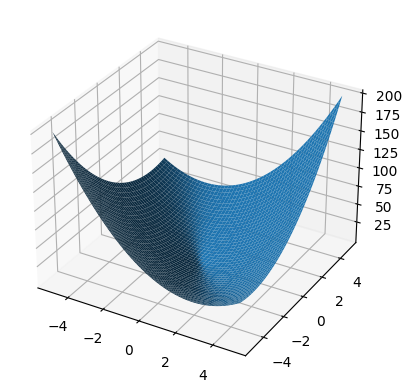

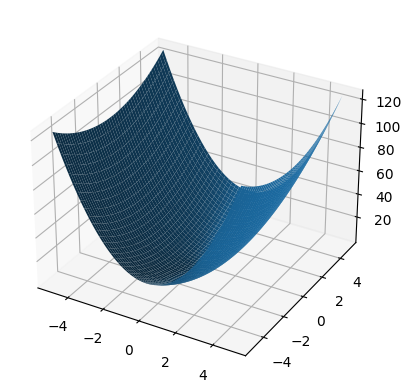

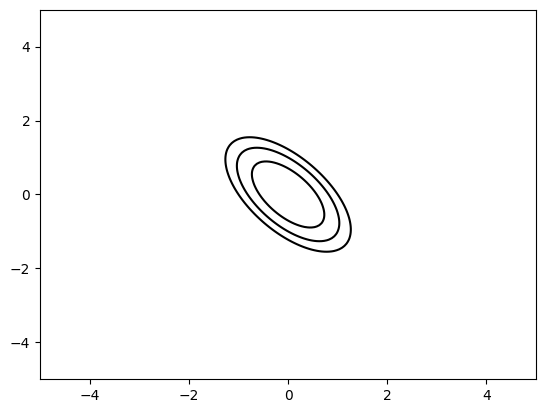

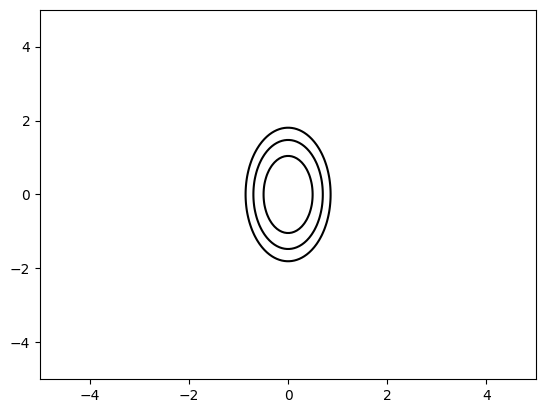

Matriz: [[-3, 1], [-2, -1]]
Coeficientes: [-3. -1. -1.]
Es simetrica ?: False
forma simetrica: [[-3.  -0.5]
 [-0.5 -1. ]]
Matriz diagonal de valores propios: [[-3.11803399  0.        ]
 [ 0.         -0.88196601]]
Matriz de vectores propios: [[-0.8816746   0.47185793]
 [-0.47185793 -0.8816746 ]]
La matriz es: def-


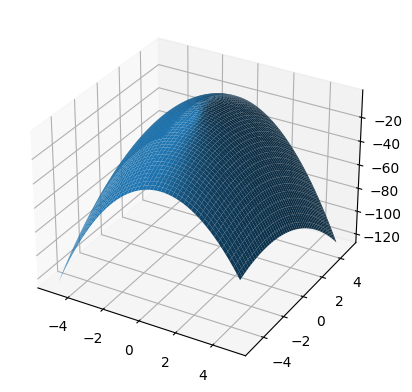

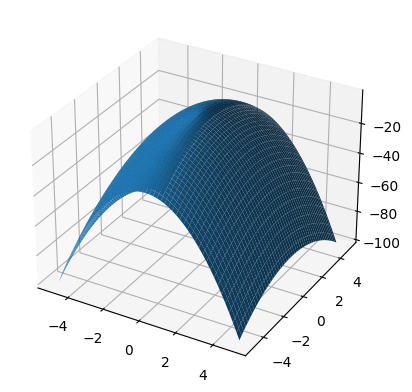

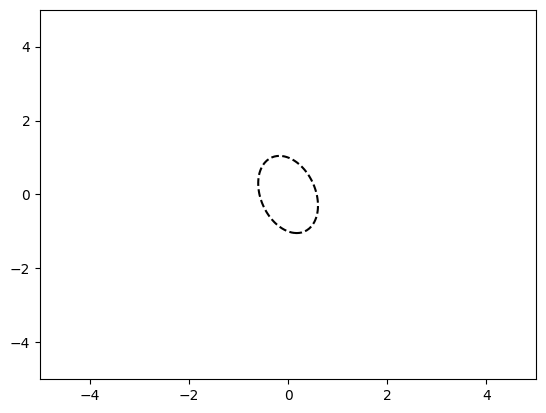

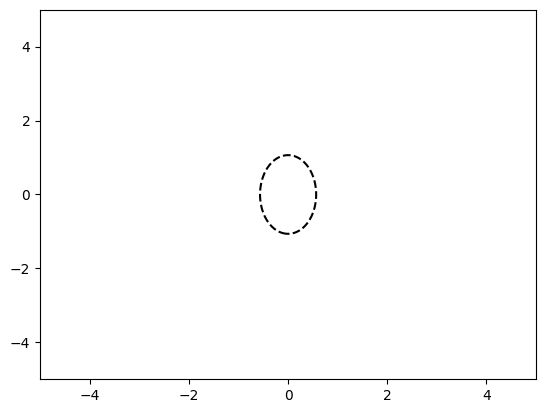

Matriz: [[0, 2], [1, 0]]
Coeficientes: [0. 0. 3.]
Es simetrica ?: False
forma simetrica: [[0.  1.5]
 [1.5 0. ]]
Matriz diagonal de valores propios: [[ 1.5  0. ]
 [ 0.  -1.5]]
Matriz de vectores propios: [[-0.8816746   0.47185793]
 [-0.47185793 -0.8816746 ]]
La matriz es: indef
La matriz no es sim√©trica


In [64]:
Matrices = [[[3, 2], [1, 2]], [[-3, 1], [-2, -1]], [[0, 2], [1, 0]]]
for M in Matrices:
    print("Matriz:", M)
    M_array = np.array(M)

    print("Coeficientes:", coeficientes(M_array))
    print("Es simetrica ?:", es_simetrica(M_array))

    if es_simetrica(M_array):
        print("Es simetrica")
    else:
        print("forma simetrica:", (M_array+M_array.T)/2)
        
    matriz_diag, eigenvectors = eigen_matrixes(M) 
    print("Matriz diagonal de valores propios:", matriz_diag)
    print("Matriz de vectores propios:", eigen_vectors)

    print("La matriz es:", is_defined(M))

    if is_defined(M) == "def+" or is_defined(M) == "def-":   
        graph_forma_cuadratica(M,  matriz_diag, eigenvectors)
    else:
        print("La matriz no es sim√©trica")